Group ID: 6

# **Spotify Song & Genre Analysis, Popularity Prediction and Building a Simple Recommendation System**

Project Members:

            Ali Sinan Çetingöz
            Arda Tozkoparan 
            Serra Akyıldız

We see from our correlation heatmap,  popularity and energy have positive correlation.
Accordingly, we select form our hyptohesis as the following:

$\mu_{low_e}$:avg. popularity of low energy songs $\mu_{high_e}$: avg. popularity of  high energy songs

$H_0: \mu_{low_e} = \mu_{high_e}$ (Null Hypothesis)

$H_A: \mu_{high_e} &gt; \mu_{low_e}$ (Alternative Hypothesis)

Then, we conduct a one-tailed T test to decide whether to reject or not reject our hypothesis


### **INTRODUCTION / PROBLEM DEFINITION**

As the dataset provides many songs with pre-calculated features along with the genre information, there is a great potential to analyze how these features change with different genres. Groups with more number of students can also focus on building a simple recommendation model based on feature similarities of songs in the dataset. As the dataset spans over a long time, how the features of genres change over time can be analyzed at both Exploratory Data Analysis and Statistical Analysis & Hypothesis Testing sections.

# **Utilized Datasets**

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount = True)

path_prefix = "./drive/My Drive"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns
from sklearn import preprocessing
  
%matplotlib inline

Mounted at ./drive


In [ ]:
dataFile = "data.csv"
df_data = pd.read_csv(join(path_prefix, dataFile))

byGenreFile = "data_by_genres.csv"
df_bg = pd.read_csv(join(path_prefix, byGenreFile))

wGenreFile = "data_w_genres.csv"
df_wg = pd.read_csv(join(path_prefix, wGenreFile))

byYearFile = "data_by_year.csv"
df_byear = pd.read_csv(join(path_prefix, byYearFile))

The datasets above were gathered from [Kaggle](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks).

---



Below you can see the content, data types, number of observations and general statistical analysis for the ***data.csv*** file.





In [ ]:
df_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [ ]:
df_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [ ]:
print("The data shape is", df_data.shape)

The data shape is (174389, 19)


We can see that this dataset includes 174389 songs, along with their artists, popularity, years and similar musical features.

---



Below you can see the content, data types, number of observations and general statistical analysis for the ***data_by_genres.csv*** file.



In [ ]:
df_bg.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1


In [ ]:
df_bg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            3232 non-null   object 
 1   acousticness      3232 non-null   float64
 2   danceability      3232 non-null   float64
 3   duration_ms       3232 non-null   float64
 4   energy            3232 non-null   float64
 5   instrumentalness  3232 non-null   float64
 6   liveness          3232 non-null   float64
 7   loudness          3232 non-null   float64
 8   speechiness       3232 non-null   float64
 9   tempo             3232 non-null   float64
 10  valence           3232 non-null   float64
 11  popularity        3232 non-null   float64
 12  key               3232 non-null   int64  
 13  mode              3232 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.6+ KB


In [ ]:
df_bg.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,3232.000000,3232.000000,3.232000e+03,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,0.368161,0.540810,2.614567e+05,0.583474,0.254888,0.204010,-10.396208,0.084999,119.707549,0.483757,29.701618,5.942450,0.819926
std,0.319697,0.149353,1.255810e+05,0.232931,0.283907,0.103440,5.024042,0.081157,17.333590,0.200382,18.415394,3.342851,0.384309
min,0.000001,0.063200,3.094600e+04,0.000953,0.000000,0.016500,-40.637000,0.024300,61.364269,0.019285,0.000000,0.000000,0.000000
25%,0.082914,0.450250,2.068497e+05,0.419648,0.013383,0.142317,-12.212486,0.046431,109.480352,0.341571,15.190070,3.000000,1.000000
50%,0.280119,0.550334,2.418786e+05,0.622982,0.128343,0.185618,-9.097583,0.060769,120.142000,0.488364,32.181281,7.000000,1.000000
75%,0.629265,0.645470,2.873741e+05,0.756599,0.443383,0.233807,-7.038634,0.091795,128.253833,0.626171,43.069058,9.000000,1.000000
max,0.996000,0.940000,3.478338e+06,0.999000,0.984000,0.944000,-0.862000,0.956000,211.968000,0.997000,79.000000,11.000000,1.000000


In [ ]:
print("The data shape is", df_bg.shape)

The data shape is (3232, 14)


We can see that there are 3232 unique genres in the dataset.

---



Below you can see the content, data types, number of observations and general statistical analysis for the ***data_w_genres.csv*** file.


In [ ]:
df_wg.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [ ]:
df_wg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32539 entries, 0 to 32538
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           32539 non-null  object 
 1   acousticness      32539 non-null  float64
 2   danceability      32539 non-null  float64
 3   duration_ms       32539 non-null  float64
 4   energy            32539 non-null  float64
 5   instrumentalness  32539 non-null  float64
 6   liveness          32539 non-null  float64
 7   loudness          32539 non-null  float64
 8   speechiness       32539 non-null  float64
 9   tempo             32539 non-null  float64
 10  valence           32539 non-null  float64
 11  popularity        32539 non-null  float64
 12  key               32539 non-null  int64  
 13  mode              32539 non-null  int64  
 14  count             32539 non-null  int64  
 15  genres            32539 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

In [ ]:
df_wg.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,32539.000000,32539.000000,3.253900e+04,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000
mean,0.455682,0.552737,2.485982e+05,0.525908,0.233281,0.209035,-11.008171,0.092047,117.433745,0.498812,24.473452,5.459787,0.734903,12.561818
std,0.383678,0.176445,1.581808e+05,0.267402,0.334487,0.151781,5.568630,0.111257,24.467506,0.247154,23.021041,3.473653,0.441392,52.407821
min,0.000000,0.000000,8.042000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.055155,0.436487,1.804616e+05,0.299000,0.000012,0.109000,-13.792500,0.039700,100.983500,0.305792,0.000000,2.000000,0.000000,2.000000
50%,0.391833,0.563000,2.215070e+05,0.537375,0.009550,0.162000,-9.887000,0.052822,118.779000,0.506000,22.666667,6.000000,1.000000,2.000000
75%,0.876000,0.684500,2.815870e+05,0.747039,0.451149,0.259500,-6.944500,0.090800,130.552000,0.691500,43.141941,8.000000,1.000000,7.000000
max,0.996000,0.987000,4.696690e+06,1.000000,1.000000,0.986000,3.367000,0.971000,219.833000,0.997000,94.000000,11.000000,1.000000,3179.000000


In [ ]:
print("The data shape is", df_wg.shape)

The data shape is (32539, 16)


We can understand that there are 32539 artists in the dataset.

---



Below you can see the content, data types, number of observations and general statistical analysis for the ***data_by_year.csv*** file.


In [ ]:
df_byear

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2017,0.207413,0.580475,243402.249536,0.686392,0.247068,0.231513,-8.026319,0.096717,121.829807,0.436313,31.662338,1,1
98,2018,0.233836,0.602731,227073.140015,0.659552,0.229874,0.231009,-8.173434,0.121045,123.644288,0.426566,27.599484,7,1
99,2019,0.261344,0.603101,225463.326320,0.629781,0.221123,0.218501,-8.527674,0.106820,122.419702,0.457813,32.346930,7,1
100,2020,0.202303,0.605285,218977.482767,0.674247,0.249008,0.234415,-8.077563,0.100629,124.058308,0.468030,24.064741,0,1


In [ ]:
df_byear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              102 non-null    int64  
 1   acousticness      102 non-null    float64
 2   danceability      102 non-null    float64
 3   duration_ms       102 non-null    float64
 4   energy            102 non-null    float64
 5   instrumentalness  102 non-null    float64
 6   liveness          102 non-null    float64
 7   loudness          102 non-null    float64
 8   speechiness       102 non-null    float64
 9   tempo             102 non-null    float64
 10  valence           102 non-null    float64
 11  popularity        102 non-null    float64
 12  key               102 non-null    int64  
 13  mode              102 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.3 KB


In [ ]:
df_byear.describe()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,1970.500000,0.548818,0.536939,228698.383547,0.455189,0.214148,0.212475,-12.192694,0.116602,116.096664,0.530724,22.949745,3.794118,1.0
std,29.588849,0.271056,0.049568,28440.517398,0.164968,0.109135,0.016892,3.048535,0.107207,5.944764,0.058941,16.780564,3.518940,0.0
min,1920.000000,0.189632,0.415141,140135.140496,0.208856,0.099986,0.162309,-20.840083,0.051205,100.033149,0.378276,0.090909,0.000000,1.0
25%,1945.250000,0.298426,0.501910,211933.800750,0.280230,0.124572,0.200305,-14.298878,0.064468,111.042118,0.492407,3.315919,0.000000,1.0
50%,1970.500000,0.458340,0.541315,238300.393513,0.494563,0.182022,0.212563,-11.849556,0.084892,117.813859,0.541784,29.160167,2.000000,1.0
75%,1995.750000,0.843186,0.573307,249445.435116,0.595108,0.283295,0.222198,-9.756256,0.101711,120.635131,0.570131,36.105230,7.000000,1.0
max,2021.000000,0.962702,0.655929,284759.933638,0.694245,0.581701,0.262480,-7.376558,0.627131,125.203277,0.669676,50.873598,10.000000,1.0


In [ ]:
print("The data shape is", df_byear.shape)

The data shape is (102, 14)


We can see that there 102 year values, spanning from 1920 to 2021 with each 
year's musical features.

---



# **Exploratory Data Analysis**

### ***Visualizations of Descriptive Statistics***

The plot below shows us the distribution of the song popularities, it is expected that a very large portion of total songs is very poor in popularity.

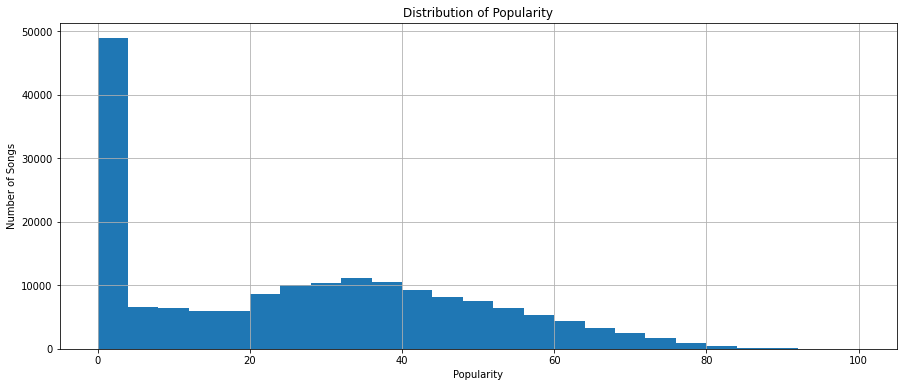

In [ ]:
plt.figure(figsize= (15,6))
df_data['popularity'].hist(bins = 25)
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")
plt.show()

As we can see, a vast majority of songs (about 50000) have around 0 popularity value and there is second small peak at around popularity value of 35, with just over 10000 songs.



---
We will filter the dataset to erase the popularity values under 20, as there is a vast data at 0 popularity band which would manipulate our data in an unwanted way.


In [ ]:
df_dataFiltered = df_data[df_data["popularity"] > 20]
df_dataFiltered

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
477,0.99600,['Bessie Smith'],0.614,177133,0.0423,0,2wAfHM7Whz67VFbdanhZlk,0.002930,4,0.1830,-12.033,1,Nobody Knows You When You're Down and Out,41,1923,0.0535,89.822,0.211,1923
478,0.98400,"['Louis Armstrong', 'Earl Hines']",0.831,161933,0.2620,0,3eMrYc092k7SIJfWJ7oasR,0.912000,8,0.2040,-12.386,1,Weather Bird,37,1923,0.0942,104.606,0.901,1923
479,0.99600,['Bessie Smith'],0.537,206600,0.0443,0,2AZgaYZSwUosJD71J2N2Zo,0.000265,3,0.1520,-16.474,0,'Tain't Nobody's Bizness If I Do,29,1923,0.0343,80.468,0.137,1923
480,0.98600,['Bessie Smith'],0.771,201480,0.0905,0,0V1iYWPXCBTaB6dhbiprGF,0.000141,3,0.1520,-7.788,1,Send Me to the 'Lectric Chair,25,1923,0.0613,87.571,0.601,1923
481,0.99200,['Bessie Smith'],0.693,167640,0.0270,0,6qRvnXftofjYJm1Mg98UWL,0.000000,0,0.1340,-13.506,0,Need a Little Sugar in My Bowl,26,1923,0.0562,75.749,0.402,1923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174351,0.00984,['Foo Fighters'],0.530,253840,0.7590,0,3NUmUIyzNLBp8bCFMH8Mif,0.000000,7,0.3190,-7.067,1,Waiting On A War,69,2021-01-14,0.0351,131.999,0.502,2021
174353,0.71500,['Jazmine Sullivan'],0.734,43320,0.3460,0,0fJ1caLzidzTlIL3pPX1eU,0.000000,2,0.3940,-11.722,1,Precious' Tale,59,2021-01-08,0.3550,88.849,0.930,2021
174355,0.49800,['ZAYN'],0.597,196493,0.3680,0,3HSUqAErTyFQWLfLdnFVnB,0.000000,2,0.1090,-10.151,0,Connexion,52,2021-01-15,0.0936,171.980,0.590,2021
174361,0.10500,['Ashnikko'],0.781,172720,0.4870,1,660rulYF3eLCuW6rQpiMdL,0.000000,1,0.0802,-7.301,0,Little Boy,61,2021-01-15,0.1670,129.941,0.327,2021


We wanted to see the correlations between the columns so we created a heatmap.


In [ ]:
corr = df_dataFiltered[['acousticness','danceability','energy','instrumentalness','liveness','loudness',"popularity",'tempo','speechiness','valence']].corr()
plt.figure(figsize=(17,10))
sns.heatmap(corr,cmap="Blues", annot= True)

NameError: ignored

All correlations between music features of songs can be seen in the heatmap.

We can see that there is a strong **positive correlation between energy and loudness**, and also there is a **strong negative correlation between energy and acousticness.**

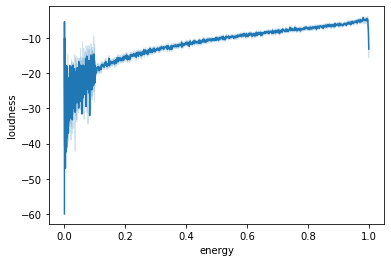

In [ ]:
sns.lineplot(data=df_dataFiltered, x="energy",y="loudness",palette="flare")



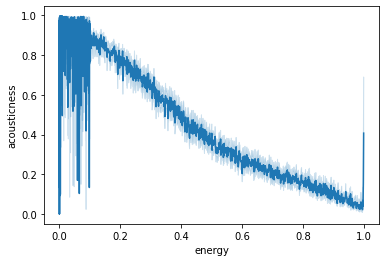

In [ ]:
sns.lineplot(data=df_dataFiltered, x="energy",y="acousticness",palette="flare")


### ***Visualizations of Aggregated Forms Based on Features***

In [ ]:
temp=[]
for x in df_data['artists']:
  noBracket = x.strip("[]")
  noComma = noBracket.split(",")[0]
  sub = noComma[1:-1]
  temp.append(sub)
df_data['artists'] = temp 

result = pd.merge(df_data, df_wg, on="artists")
result

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count,genres
0,0.9910,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920,0.9830,0.62725,177981.750000,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,"['harlem renaissance', 'traditional blues']"
1,0.9930,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920,0.9830,0.62725,177981.750000,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,"['harlem renaissance', 'traditional blues']"
2,0.9920,Mamie Smith,0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.1760,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.487,1920,0.9830,0.62725,177981.750000,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,"['harlem renaissance', 'traditional blues']"
3,0.9950,Mamie Smith,0.482,198000,0.2290,0,0lqEx4vktZP1y9hnwfF27Y,0.000061,7,0.5490,-12.619,1,Kansas City Man Blues - 78rpm Version,4,1920,0.0812,77.232,0.461,1920,0.9830,0.62725,177981.750000,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,"['harlem renaissance', 'traditional blues']"
4,0.9920,Mamie Smith,0.574,189800,0.1380,0,4HYmmG8uHL2hP4zSFWavKF,0.000492,3,0.2330,-14.171,1,Miss Jenny's Ball (aka There'll Be No Freebies...,1,1920,0.1090,158.422,0.764,1920,0.9830,0.62725,177981.750000,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,"['harlem renaissance', 'traditional blues']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173595,0.8520,caleb scarberry,0.555,174010,0.2990,1,7Kvz6HUGWyzKpLewRNykaa,0.690000,9,0.1540,-9.661,1,2020 was the worst year of my fucking life - F...,5,2021-01-05,0.5970,109.204,0.618,2021,0.8520,0.55500,174010.000000,0.299000,0.690000,0.154000,-9.661000,0.597000,109.204000,0.618000,5.0000,9,1,2,[]
173596,0.2820,SPiCYSOL,0.608,313253,0.3680,0,1AL6lQa6NHNwOKTtVfMFga,0.000002,5,0.0908,-8.539,0,10years vintage - LiVE from 2020.3.5 @EBISU LI...,12,2020-05-27,0.0278,125.941,0.212,2020,0.2820,0.60800,313253.000000,0.368000,0.000002,0.090800,-8.539000,0.027800,125.941000,0.212000,12.0000,5,0,2,"['city pop', 'japanese r&b']"
173597,0.8250,Lincoln,0.695,103343,0.2320,0,3JPnVN4wYlmQnuD7OgDx88,0.000000,1,0.5900,-11.010,1,Saint Bernard,68,2020-09-18,0.0972,100.488,0.451,2020,0.8250,0.69500,103343.000000,0.232000,0.000000,0.590000,-11.010000,0.097200,100.488000,0.451000,68.0000,1,1,2,"['indie pop', 'modern indie pop']"
173598,0.0205,RAYE,0.749,197573,0.8200,0,3DTqHfTGj1c6y2gDXsTez4,0.000685,7,0.0775,-6.114,1,Regardless,76,2020-11-20,0.0478,120.066,0.534,2020,0.0343,0.81500,183702.333333,0.785333,0.000752,0.155833,-5.628667,0.040800,119.329333,0.696000,80.0000,6,0,3,"['dance pop', 'pop', 'pop dance', 'post-teen p..."


We dropped the mean artist feature values in order to work on songs specifically.

In [ ]:
merged_data = result.drop(['acousticness_y','danceability_y','duration_ms_y','energy_y','instrumentalness_y','liveness_y',
             'loudness_y','speechiness_y','tempo_y','valence_y','popularity_y','key_y','mode_y'],axis=1)
merged_data.head()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,count,genres
0,0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920,16,"['harlem renaissance', 'traditional blues']"
1,0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920,16,"['harlem renaissance', 'traditional blues']"
2,0.992,Mamie Smith,0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.176,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.487,1920,16,"['harlem renaissance', 'traditional blues']"
3,0.995,Mamie Smith,0.482,198000,0.2290,0,0lqEx4vktZP1y9hnwfF27Y,0.000061,7,0.549,-12.619,1,Kansas City Man Blues - 78rpm Version,4,1920,0.0812,77.232,0.461,1920,16,"['harlem renaissance', 'traditional blues']"
4,0.992,Mamie Smith,0.574,189800,0.1380,0,4HYmmG8uHL2hP4zSFWavKF,0.000492,3,0.233,-14.171,1,Miss Jenny's Ball (aka There'll Be No Freebies...,1,1920,0.1090,158.422,0.764,1920,16,"['harlem renaissance', 'traditional blues']"


We change genres from string to list for a much clearer sorting.

In [ ]:
merged_data['genres'] = merged_data.genres.apply(lambda x: x[1:-1].split(','))
merged_data.genres

0              ['harlem renaissance',  'traditional blues']
1              ['harlem renaissance',  'traditional blues']
2              ['harlem renaissance',  'traditional blues']
3              ['harlem renaissance',  'traditional blues']
4              ['harlem renaissance',  'traditional blues']
                                ...                        
173595                                                   []
173596                        ['city pop',  'japanese r&b']
173597                   ['indie pop',  'modern indie pop']
173598    ['dance pop',  'pop',  'pop dance',  'post-tee...
173599    ['italian hip hop',  'italian pop',  'trap ita...
Name: genres, Length: 173600, dtype: object

Checking if transforming string to list is successful.


In [ ]:
 len(merged_data.genres[0])

2

Now there is one instance of genre in each row.

In [ ]:
exploded_data = merged_data.explode('genres').reset_index()
exploded_data.head()

,index,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,count,genres
0,0,0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920,16,'harlem renaissance'
1,0,0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920,16,'traditional blues'
2,1,0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920,16,'harlem renaissance'
3,1,0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920,16,'traditional blues'
4,2,0.992,Mamie Smith,0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.176,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.487,1920,16,'harlem renaissance'


Sorting most popular genres.

In [ ]:
df_genres_popular = exploded_data[['genres','popularity_x','instrumentalness_x','acousticness_x']].groupby('genres').mean().sort_values(by='popularity_x',ascending = False)[:15].reset_index()
df_genres_popular

,genres,popularity_x,instrumentalness_x,acousticness_x
0,'tropical house',86.0,0.001880,0.06860
1,'puerto rican pop',83.2,0.000013,0.20006
2,'pop venezolano',80.5,0.000000,0.42105
3,'indie rockism',80.0,0.000000,0.01280
4,'r&b en espanol',79.5,0.001626,0.29100
5,'trap latino',78.0,0.001221,0.26420
6,'korean mask singer',78.0,0.000002,0.23800
7,'san diego rap',77.0,0.000990,0.03120
8,'basshall',77.0,0.000104,0.21600
9,'ritmo kombina',77.0,0.000104,0.21600


Sorting the most popular 15 songs to their instrumentalness.

In [ ]:
df_genres_popular.groupby('genres').mean().sort_values(by='instrumentalness_x',ascending = False).reset_index()

,genres,popularity_x,instrumentalness_x,acousticness_x
0,'rochester mn indie',76.0,0.897000,0.03470
1,'tropical house',86.0,0.001880,0.06860
2,'r&b en espanol',79.5,0.001626,0.29100
3,'trap latino',78.0,0.001221,0.26420
4,'san diego rap',77.0,0.000990,0.03120
5,'dutch rap pop',77.0,0.000104,0.21600
6,'ritmo kombina',77.0,0.000104,0.21600
7,'basshall',77.0,0.000104,0.21600
8,'puerto rican pop',83.2,0.000013,0.20006
9,'yaoi',77.0,0.000003,0.00655


We erased the outlier value 'rochester mn indie' to get more meaningful results.

In [ ]:
df_genres_popular_outlier = df_genres_popular[:14]
df_genres_popular_outlier

,genres,popularity_x,instrumentalness_x,acousticness_x
0,'tropical house',86.0,0.001880,0.06860
1,'puerto rican pop',83.2,0.000013,0.20006
2,'pop venezolano',80.5,0.000000,0.42105
3,'indie rockism',80.0,0.000000,0.01280
4,'r&b en espanol',79.5,0.001626,0.29100
5,'trap latino',78.0,0.001221,0.26420
6,'korean mask singer',78.0,0.000002,0.23800
7,'san diego rap',77.0,0.000990,0.03120
8,'basshall',77.0,0.000104,0.21600
9,'ritmo kombina',77.0,0.000104,0.21600


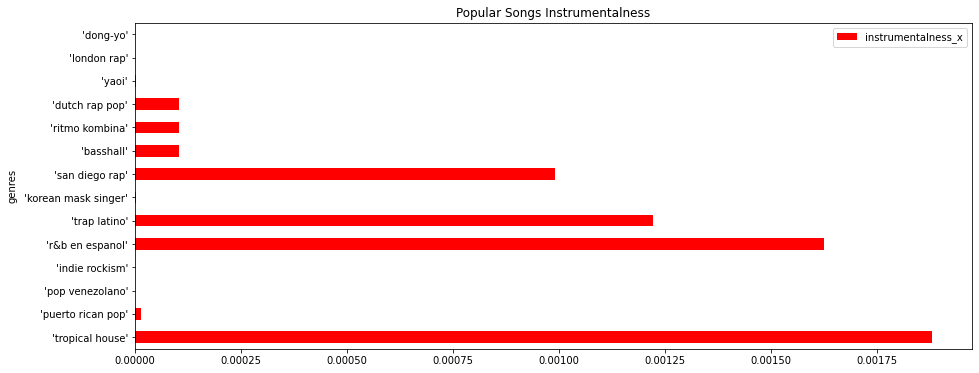

In [ ]:
df_genres_popular_outlier.plot.barh(x='genres', y='instrumentalness_x', figsize=(15,6), title= 'Popular Songs Instrumentalness', color='red')

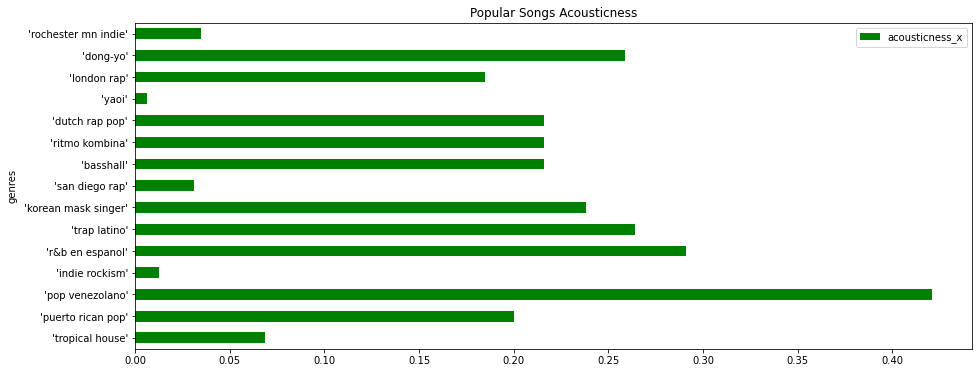

In [ ]:
df_genres_popular.plot.barh(x='genres', y='acousticness_x', figsize=(15,6), title= 'Popular Songs Acousticness', color='green')

We also wanted to check the 15 longest songs.

### ***Analysis of the Most Popular Artists and Songs***

In order to clearly analyze artist and song data based on their musical features including genres, we have to merge two datasets ***data.csv and data_w_genres.csv*** on the "artists" cloumn.

In [ ]:
merged = result.drop(columns = ['acousticness_y', 'danceability_y', 'duration_ms_y', 
            'energy_y', 'instrumentalness_y','liveness_y','loudness_y',
            'speechiness_y', 'tempo_y','valence_y', 'key_y',
            'mode_y','count', 'release_date', 'id'])
merged.head()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,speechiness_x,tempo_x,valence_x,year,popularity_y,genres
0,0.991,Mamie Smith,0.598,168333,0.2240,0,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.634,1920,3.1875,"['harlem renaissance', 'traditional blues']"
1,0.993,Mamie Smith,0.647,163827,0.1860,0,0.000018,0,0.519,-12.098,1,Golfing Papa,4,0.1740,97.600,0.689,1920,3.1875,"['harlem renaissance', 'traditional blues']"
2,0.992,Mamie Smith,0.782,195200,0.0573,0,0.000002,5,0.176,-12.453,1,Don't You Advertise Your Man,5,0.0592,85.652,0.487,1920,3.1875,"['harlem renaissance', 'traditional blues']"
3,0.995,Mamie Smith,0.482,198000,0.2290,0,0.000061,7,0.549,-12.619,1,Kansas City Man Blues - 78rpm Version,4,0.0812,77.232,0.461,1920,3.1875,"['harlem renaissance', 'traditional blues']"
4,0.992,Mamie Smith,0.574,189800,0.1380,0,0.000492,3,0.233,-14.171,1,Miss Jenny's Ball (aka There'll Be No Freebies...,1,0.1090,158.422,0.764,1920,3.1875,"['harlem renaissance', 'traditional blues']"


These are the artists with highest popularity with their corresponding features.

In [ ]:
popular_artist = result[["popularity_y","artists", "year","danceability_y", "energy_y",
                     "speechiness_y", "acousticness_y", "loudness_y", "tempo_y",
                     "instrumentalness_y"]]
popular_artist = popular_artist.sort_values(by = "popularity_y", ascending=False).reset_index().drop(["index"], axis = 1)
popular_artist                  

,popularity_y,artists,year,danceability_y,energy_y,speechiness_y,acousticness_y,loudness_y,tempo_y,instrumentalness_y
0,94.0,CJ,2020,0.711000,0.598000,0.182000,0.190000,-7.621000,140.175000,0.000000
1,92.0,Boza,2020,0.725000,0.756000,0.057200,0.362000,-5.013000,100.070000,0.000685
2,91.0,Joel Corry,2020,0.734000,0.874000,0.066200,0.168000,-3.158000,122.953000,0.000011
3,89.0,Lele Pons,2020,0.905000,0.686000,0.066400,0.090700,-3.152000,103.013000,0.000000
4,89.0,Ritt Momney,2020,0.399000,0.491000,0.053800,0.056300,-10.778000,91.066000,0.000890
...,...,...,...,...,...,...,...,...,...,...
173595,0.0,Tadeusz Dolega Mostowicz,1932,0.680885,0.222287,0.955717,0.451377,-23.232556,105.357162,0.000010
173596,0.0,Tadeusz Dolega Mostowicz,1932,0.680885,0.222287,0.955717,0.451377,-23.232556,105.357162,0.000010
173597,0.0,Tadeusz Dolega Mostowicz,1932,0.680885,0.222287,0.955717,0.451377,-23.232556,105.357162,0.000010
173598,0.0,Tadeusz Dolega Mostowicz,1932,0.680885,0.222287,0.955717,0.451377,-23.232556,105.357162,0.000010


The most popular 15 artists.

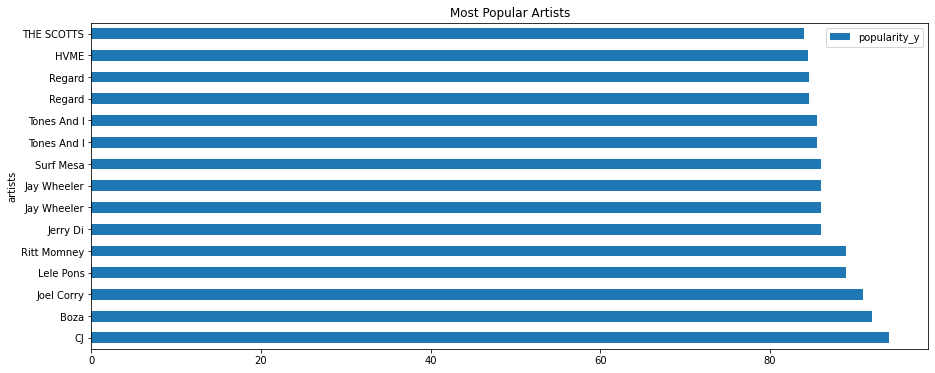

In [ ]:
populartist = popular_artist[0:15]
populartist.plot.barh(x='artists', y='popularity_y', figsize=(15,6), title= 'Most Popular Artists')

Now, we will check the most popular songs with their corresponding features.

In [ ]:
popularnew = merged[["popularity_x", "name","artists", "year","danceability_x", "energy_x",
                     "speechiness_x", "acousticness_x", "loudness_x", "tempo_x",
                     "instrumentalness_x", "genres"]]
popularnew = popularnew.sort_values(by = "popularity_x", ascending=False).reset_index().drop(["index"], axis = 1)
popularnew

,popularity_x,name,artists,year,danceability_x,energy_x,speechiness_x,acousticness_x,loudness_x,tempo_x,instrumentalness_x,genres
0,100,drivers license,Olivia Rodrigo,2021,0.585,0.436,0.0601,0.721000,-8.761,143.874,0.000013,"['pop', 'post-teen pop']"
1,96,Mood (feat. iann dior),24kGoldn,2020,0.700,0.722,0.0369,0.221000,-3.558,90.989,0.000000,['cali rap']
2,96,positions,Ariana Grande,2020,0.737,0.802,0.0878,0.468000,-4.771,144.015,0.000000,"['dance pop', 'pop', 'post-teen pop']"
3,95,BICHOTA,KAROL G,2020,0.863,0.666,0.1520,0.212000,-4.158,163.908,0.000493,"['latin', 'reggaeton', 'reggaeton colombiano',..."
4,95,DÁKITI,Bad Bunny,2020,0.731,0.573,0.0544,0.401000,-10.059,109.928,0.000052,"['latin', 'reggaeton', 'trap latino']"
...,...,...,...,...,...,...,...,...,...,...,...,...
173595,0,Flowtation 2007 - Roy Gates Radio Mix,Vincent de Moor,2013,0.547,0.972,0.0325,0.000449,-7.192,135.982,0.700000,"['bubble trance', 'dutch trance', 'trance', 'u..."
173596,0,Fly Away - Cosmic Gate Remix,Vincent de Moor,2007,0.538,0.871,0.0404,0.001920,-10.369,136.001,0.917000,"['bubble trance', 'dutch trance', 'trance', 'u..."
173597,0,Flowtation 2007 - Roy Gates Radio Mix,Vincent de Moor,2013,0.547,0.972,0.0325,0.000449,-7.192,135.982,0.700000,"['bubble trance', 'dutch trance', 'trance', 'u..."
173598,0,Do Baat Na Ki Aur Chale Gaye,Meena Kapoor,1948,0.375,0.190,0.1020,0.988000,-12.252,81.563,0.301000,['classic bollywood']


And these are the most popular 15 songs.

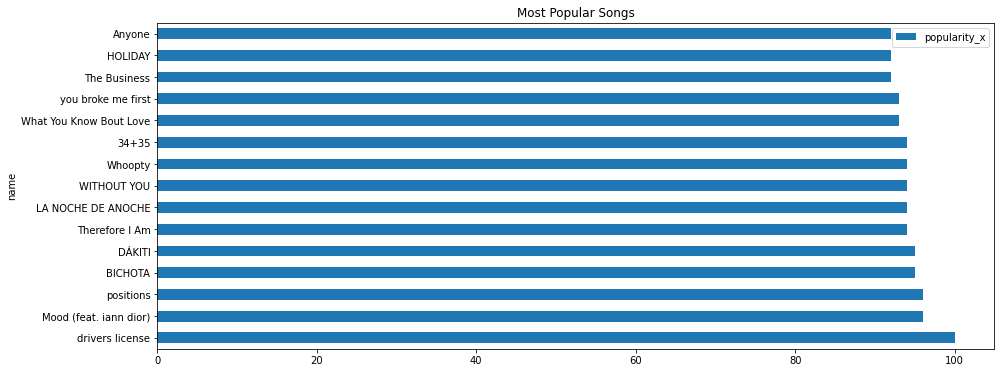

In [ ]:
popular = popularnew[0:15]
popular.plot.barh(x='name', y='popularity_x', figsize=(15,6), title= 'Most Popular Songs')

We wanted to visualize the negative correlation between acousticness and popularity.

In order to get a better view, we normalized the popularity values between 1 and 2, the acousticness values between 0 and 1.

In [ ]:
z = popular[['popularity_x']]
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (1,2))
z_scaled = min_max_scaler.fit_transform(z)
data_by_z_scale = pd.DataFrame(z_scaled)
data_by_z_scale['acousticness'] = popular['acousticness_x']
data_by_z_scale['name'] = popular['name']
data_by_z_scale.columns = ['popularity','acousticness','name']
data_by_z_scale.head()

,popularity,acousticness,name
0,2.000,0.721,drivers license
1,1.500,0.221,Mood (feat. iann dior)
2,1.500,0.468,positions
3,1.375,0.212,BICHOTA
4,1.375,0.401,DÁKITI


Below you can see the correlation graph between popularity and acousticness.

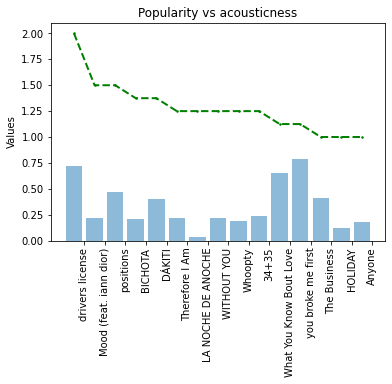

In [ ]:
plt.bar(data_by_z_scale["name"], data_by_z_scale["acousticness"], align='center', alpha=0.5)
index = np.arange(data_by_z_scale["name"].count())
bar_width = 0.50
plt.xticks(index + bar_width,data_by_z_scale["name"],rotation=90)
plt.ylabel('Values')
plt.title('Popularity vs acousticness')
plt.plot(data_by_z_scale["name"], data_by_z_scale["popularity"], color='green', marker='.', linestyle='dashed',linewidth=2, markersize=3)
plt.show()

### ***Temporal Analysis***

In [ ]:
df_byear.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


We normalized data_byear dataframe without changing year values. This helped us to visualize changes in features over the years.

In [ ]:
y = df_byear[['acousticness','danceability','energy','instrumentalness','liveness','loudness','popularity','valence']]
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y)
data_by_y_scale = pd.DataFrame(y_scaled)
data_by_y_scale['year'] = df_byear['year']
data_by_y_scale.columns = ['acousticness','danceability','energy','instrumentalness','liveness','loudness','popularity',
                'valence','year']
data_by_y_scale.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,valence,year
0,0.571243,0.417832,0.432320,0.527766,0.536483,0.608018,0.010228,0.411580,1920
1,0.869874,0.070724,0.066504,0.492350,0.428360,0.299210,0.005910,0.000000,1921
2,0.826966,0.666473,0.035676,0.321330,0.941917,0.000000,0.000000,0.662026,1922
3,0.992944,0.673619,0.110325,0.564124,0.650417,0.498448,0.100713,0.848376,1923
4,0.970893,0.559633,0.279138,1.000000,0.727854,0.490863,0.011226,0.979580,1924


Below we can see the song feature trends over time.

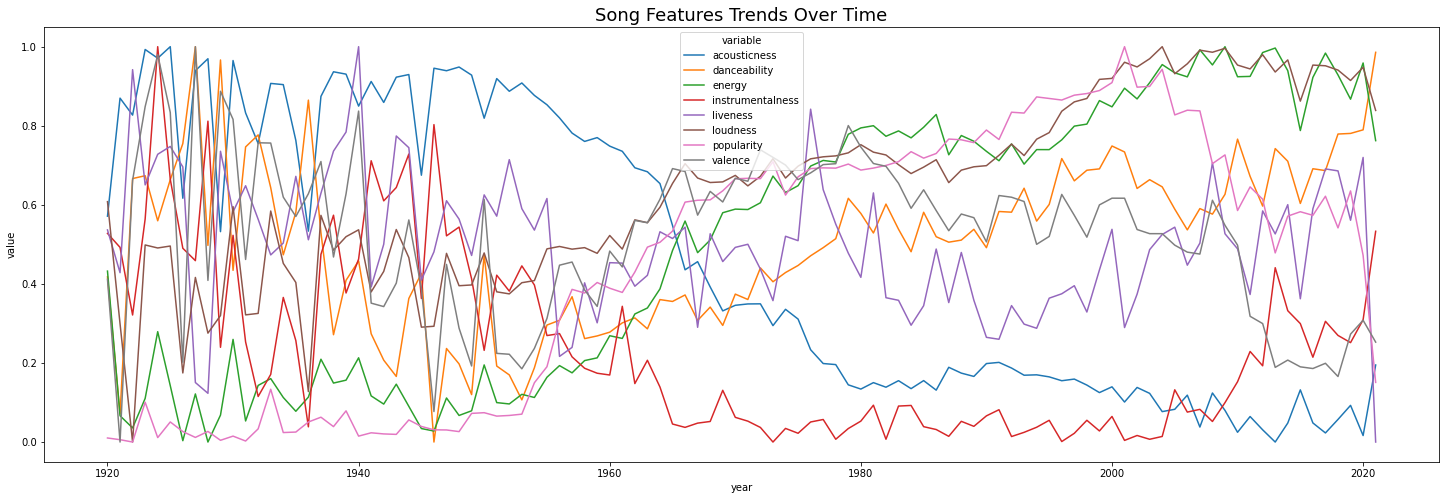

In [ ]:
data_by_y_melt = data_by_y_scale.melt(id_vars='year')
plt.figure(figsize=(25,8))
plt.title("Song Features Trends Over Time", fontsize=18)
sns.lineplot(x='year', y='value', hue='variable', data= data_by_y_melt, legend="auto")

We can see that acousticness gradually decreased over time.

---


Danceability decreased to a moderate level during 1950-60's, and gradually increased to its peak at 2020.

---

Energy is a factor which gradually increased from 1920's to late 2010's, but it is showing a small descent in 2020.

---

Instrumentalness has a very unstable curve until about 1950's, then it gradually decreased until early 2000's, and finally went upward until 2020.

---

Liveness has an unstable trajectory throughout the years.

---

Loudness has an unstable graph until about 1950's, then had a gradual increase until late 2000's, and slowly decreased since 2010's. 





## Future Work

In the next step, we will form our hypotheses and try to manipulate the data to give us clear answers.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the library to perform statistical tests
from scipy import stats
from scipy import special
from os.path import join
import seaborn as sns

%matplotlib inline

In [ ]:
from scipy.stats import ttest_ind

popularity_mean = df_data["popularity"].mean()
print(popularity_mean)

energy_mean = df_data["energy"].mean()
print(energy_mean)


popularity_std = df_data["popularity"].std()
energy_std = df_data["energy"].std()

print(popularity_std)
print(energy_std)

ttest,pval = ttest_ind(df_data["popularity"],df_data["energy"])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

stats.ttest_1samp(df_data["energy"], 100)


25.693380889849703
0.4827208433255605
21.87273982694497
0.2726854798927745
p-value 0.0
we reject null hypothesis


Ttest_1sampResult(statistic=-152403.88023285515, pvalue=0.0)

In [ ]:
test_type = "energy"

energy_d = df_data["energy"]  # completed students
popularity_d = df_data["popularity"]

print(f"mean of energy {energy_d.mean():.2f}")
print(f"mean of popularty {popularity_d.mean():.2f}")

mean of energy 0.48
mean of popularty 25.69


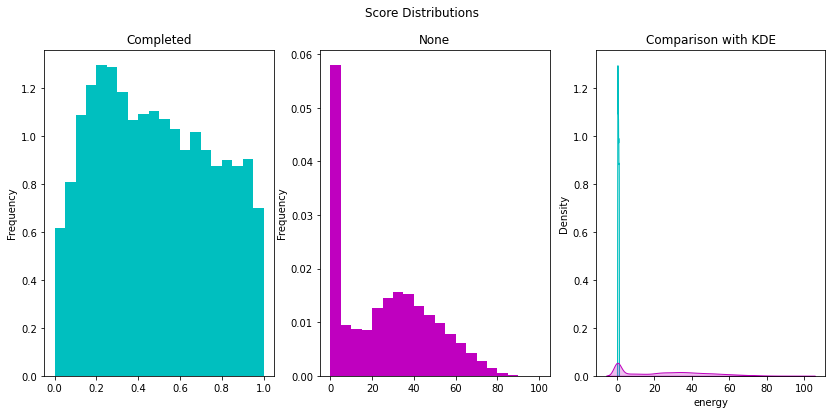

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
energy_d.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("Completed")

popularity_d.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("None")

sns.kdeplot(energy_d, shade=True, label="completed students", ax=ax[2], color="c")
sns.kdeplot(popularity_d, shade=True, label="none students", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Score Distributions")
plt.show()

In [ ]:
from scipy import stats
from scipy import special
from scipy.stats import t

popularity_mean = df_data["popularity"].mean()
energy_mean = df_data["energy"].mean()

popularity_std = df_data["popularity"].std()
energy_std = df_data["energy"].std()

n1 = len(df_data["popularity"])
n2= len(df_data ["energy"])


se1= popularity_std/ np.sqrt(n1)
se2= energy_std/ np.sqrt(n2)

se1 = stats.sem (df_data["popularity"])
se2 = stats.sem (df_data["energy"])
print(se1)
print(se2)

sed = np.sqrt(se1**2 + se2**2)
print(sed)

t_stat = (popularity_mean - energy_mean) / sed
print(t_stat)

df = n1 + n2 - 2
alpha = 0.05

cv = t.ppf(1.0 - alpha, df)
print(cv)

p = (1 - t.cdf(abs(t_stat), df)) * 2
print(p)





0.05237736467528052
0.0006529838938787108
0.05238143486286901
481.2899858990865
1.6448579958679674
0.0
